# MNIST Handwritten Digits Classification

In [1]:
# Standard imports
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from matplotlib import pyplot as plt

# Third-party imports
from losses import MSE, CrossEntropy
from layers import Dense
from network import Network
from activations import Tanh, Softmax

plt.style.use('ggplot')

In [32]:
def show_image(img: np.ndarray) -> None:
    """ Plots an image on grayscale """
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')


def get_accuracy(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """ Calculates the accuracy of the predictions """
    return (np.argmax(y_pred, axis = 1) == np.argmax(y_true, axis = 1)).sum() / len(y_true)


def subsample(x: np.ndarray, y: np.ndarray, n: int) -> tuple:
    """ Returns a subsample of the dataset """
    return x[:n], y[:n]

### Loading the Data

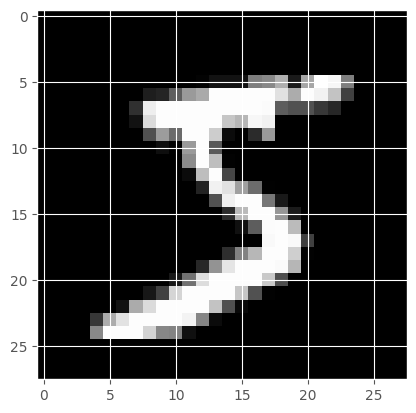

In [33]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
show_image(x_train[0])  # Show image example

In [34]:
def reshape_and_normalize_data(data: np.ndarray) -> np.ndarray:
    """ Reshapes and normalizes the data """
    data = data.reshape(data.shape[0], 1, 28 * 28)
    return data.astype('float32') / 255

# Reshape and normalize the data
x_train = reshape_and_normalize_data(x_train)
x_test = reshape_and_normalize_data(x_test)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

### Defining Model Architecture

In [35]:
network = Network()                                     # Initialize network
network.add(Dense(28 * 28, 16, activation = Tanh()))    # Hidden layer #1
network.add(Dense(16, 16, activation = Tanh()))         # Hidden layer #2
network.add(Dense(16, 10, activation = Tanh()))         # Output layer
network.compile(MSE())                                  # Compile network

### Prediction with no previous training

In [36]:
X, y_true = subsample(x_train, y_train, 10000)    # Subsample the data
y_pred = network.predict(X)     # Make predictions

# Calculate the accuracy
accuracy = get_accuracy(y_true, y_pred)
print(f'Accuracy: {round(accuracy * 100, 2)}%')

Accuracy: 7.74%


### Training the Model

In [37]:
# Hyperparameters
EPOCHS = 200
LEARNING_RATE = 0.1
BATCH_SIZE = 100

history = network.fit(
    X = X,
    y = y_true,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    learning_rate = LEARNING_RATE,
    verbose = True  # Display the loss after each epoch
)

Epoch 1/200	Loss: 0.198881722911126
Epoch 2/200	Loss: 0.08444379987808696
Epoch 3/200	Loss: 0.059070576065699446
Epoch 4/200	Loss: 0.047526008833765204
Epoch 5/200	Loss: 0.037655425804384295
Epoch 6/200	Loss: 0.02791321733235503
Epoch 7/200	Loss: 0.019437554049761763
Epoch 8/200	Loss: 0.01167839971446563
Epoch 9/200	Loss: 0.007257467782056143
Epoch 10/200	Loss: 0.0043520824063257016
Epoch 11/200	Loss: 0.003967818557880146
Epoch 12/200	Loss: 0.0033568225469414424
Epoch 13/200	Loss: 0.002417992890255153
Epoch 14/200	Loss: 0.0014791982669105442
Epoch 15/200	Loss: 0.004043310695470899
Epoch 16/200	Loss: 0.0047256376965075075
Epoch 17/200	Loss: 0.0031836492449827053
Epoch 18/200	Loss: 0.0014077909011910156
Epoch 19/200	Loss: 0.0027553187391810233
Epoch 20/200	Loss: 0.0015432472911071369
Epoch 21/200	Loss: 0.0008701567471772536
Epoch 22/200	Loss: 0.0016097885915928136
Epoch 23/200	Loss: 0.002777434048094238
Epoch 24/200	Loss: 0.0026681724259089907
Epoch 25/200	Loss: 0.0022394835278734277
Epo

In [38]:
y_pred = network.predict(X)                     # Make predictions

# Calculate the accuracy
accuracy = get_accuracy(y_true, y_pred)
print(f'Train Accuracy: {round(accuracy * 100, 2)}%')

Train Accuracy: 23.33%


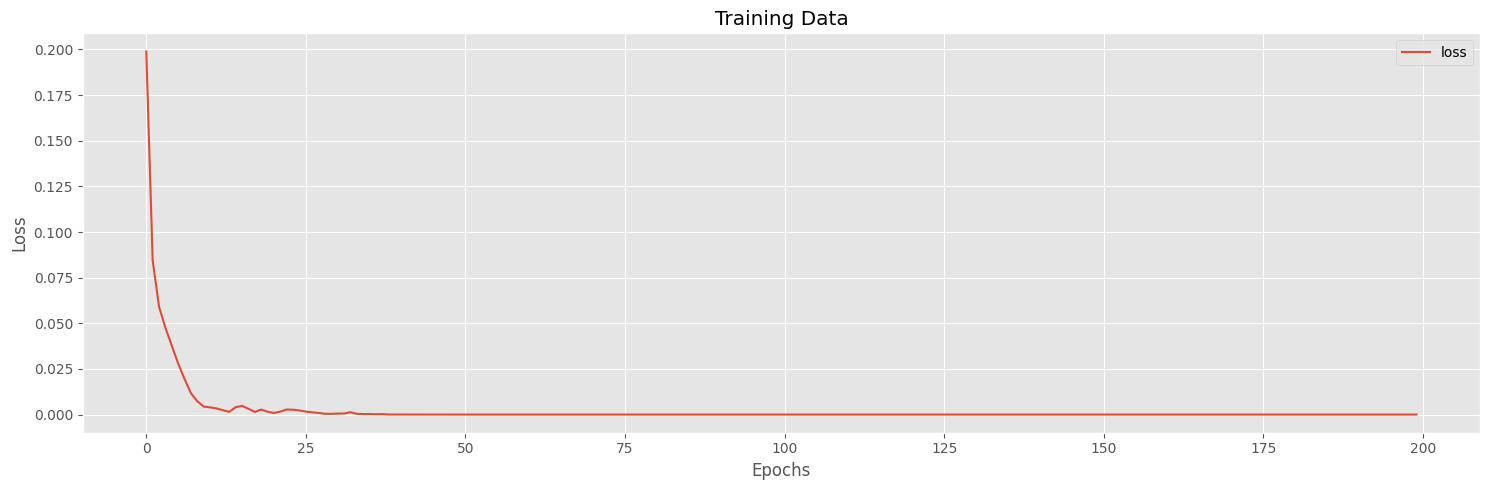

In [39]:
fig = plt.figure(figsize = (15, 5))
plt.title("Training Data")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(range(EPOCHS), history, label = 'loss')
plt.legend()
fig.tight_layout()
plt.show()

In [40]:
X, y_true = subsample(x_test, y_test, 10000)    # Subsample the data
y_pred = network.predict(X)                     # Make predictions

# Calculate the accuracy
accuracy = get_accuracy(y_true, y_pred)
print(f'Test Accuracy: {round(accuracy * 100, 2)}%')

Test Accuracy: 23.22%
